In [135]:
import pandas as pd
import seaborn as sns
import geopandas as gdp
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#### Parallel plot of income data

In [145]:
income_df = pd.read_csv('../data/raw/external_data/income_complete.csv')
income_df = income_df.drop(columns='Unnamed: 0')
income_df.head()

,SA2,SA2 NAME,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019 pred,2020 pred,2021 pred,2022 pred,2023 pred,2024 pred,2025 pred
0,201011001,Alfredton,5098,5372,5760,6225,6718,7124,7558,7989,8224.491613,8466.924808,8716.504203,8973.440445,9237.950392,9510.257294,9790.590981
1,201011002,Ballarat,7139,7158,7151,7289,7400,7470,7585,7595,7818.877682,8049.354603,8286.625287,8530.889996,8782.354891,9041.232212,9307.740456
2,201011003,Ballarat - North,12073,12063,12261,12503,12516,12889,13356,13598,13998.828008,14411.471216,14836.277901,15273.606605,15723.826439,16187.317396,16664.470668
3,201011004,Ballarat - South,11096,11168,11372,11347,11529,11905,12294,12722,13097.006171,13483.066393,13880.506505,14289.661952,14710.878067,15144.510363,15590.924830
4,201011005,Buninyong,3828,3878,3897,3966,4001,4118,4195,4249,4374.247699,4503.187321,4635.927695,4772.580855,4913.262137,5058.090279,5207.187518


<AxesSubplot:title={'center':'Parallel plot'}, xlabel='Time', ylabel='Income'>

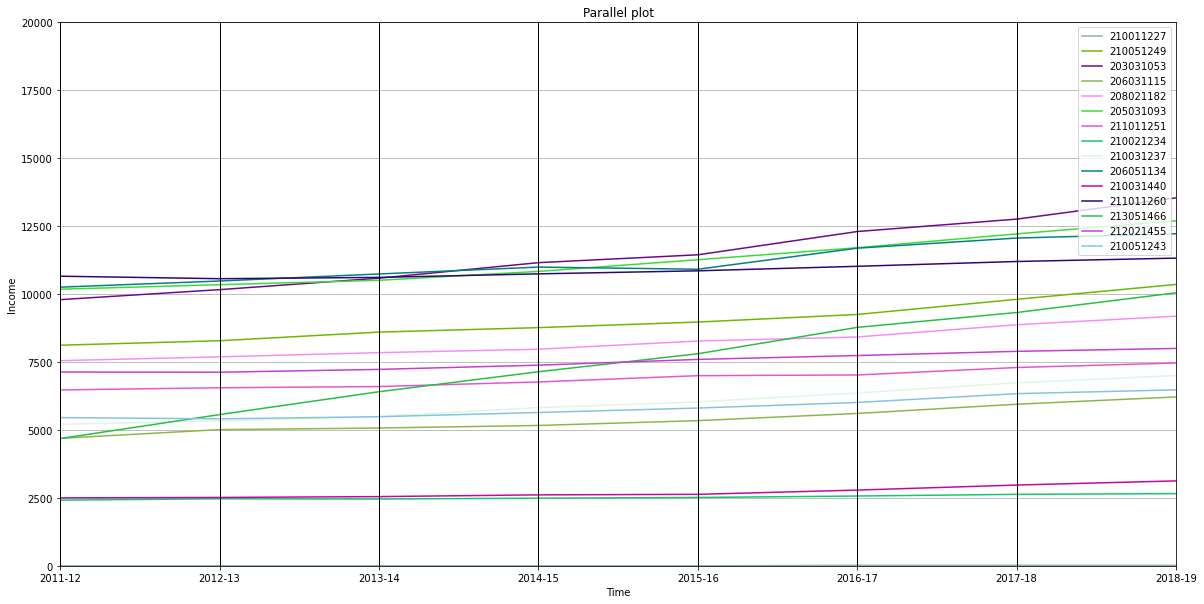

In [146]:
from cProfile import label
from turtle import title
from pandas.plotting import parallel_coordinates
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(20,10))
income_df_sample = income_df.sample(n=15, random_state=1000)
income_df_sample = income_df_sample.set_index(keys='SA2', drop=True)[['2011-12', '2012-13', '2013-14', '2014-15',
                                                                      '2015-16', '2016-17', '2017-18', '2018-19']].reset_index()
ax.set_xlabel('Time')
ax.set_ylabel('Income')
ax.set_title('Parallel plot')
ax.set_ylim(bottom=0, top=20000)
parallel_coordinates(income_df_sample, 'SA2', ax=ax)

#### Piare plot of merged dataset

In [147]:
merged_data = pd.read_csv('../data/raw/property_merged.csv')
merged_data = merged_data.drop(columns='Unnamed: 0')
merged_data.head()

,name,cost,coordinates,type,address,beds,station_distance,CBD_distance,bath,parking,postcode,SA2_CODE,2022 pred,ERP 2021,density 2021 persons/km2,scaled_crime_rate
0,1901/368 St Kilda Road Melbourne VIC 3000,1800,"[-37.8318086, 144.9710272]",Apartment / Unit / Flat,1901/368 St Kilda Road Melbourne,3,1803.65,1702.19,2,2,3000,206041122,30531.488067,47192.0,19920.0,0.789795
1,1211/200 Spencer Street Melbourne VIC 3000,480,"[-37.816228, 144.9532465]",Apartment / Unit / Flat,1211/200 Spencer Street Melbourne,1,371.68,2267.13,1,1,3000,206041122,30531.488067,47192.0,19920.0,0.789795
2,1008/380 Little Lonsdale Street Melbourne VIC ...,400,"[-37.8121026, 144.9581291]",Apartment / Unit / Flat,1008/380 Little Lonsdale Street Melbourne,1,248.50,1937.39,1,0,3000,206041122,30531.488067,47192.0,19920.0,0.789795
3,3/27 Flinders Lane Melbourne VIC 3000,420,"[-37.8147317, 144.9733655]",Apartment / Unit / Flat,3/27 Flinders Lane Melbourne,1,404.26,790.13,1,0,3000,206041122,30531.488067,47192.0,19920.0,0.789795
4,611/408 Lonsdale Street Melbourne VIC 3000,350,"[-37.8125979, 144.9604012]",Apartment / Unit / Flat,611/408 Lonsdale Street Melbourne,1,525.08,1657.95,1,0,3000,206041122,30531.488067,47192.0,19920.0,0.789795


In [148]:
merged_data.dtypes

name                         object
cost                          int64
coordinates                  object
type                         object
address                      object
beds                          int64
station_distance            float64
CBD_distance                float64
bath                          int64
parking                       int64
postcode                      int64
SA2_CODE                      int64
2022 pred                   float64
ERP 2021                    float64
density 2021 persons/km2    float64
scaled_crime_rate           float64
dtype: object

In [149]:
numeric_variables = merged_data[['cost', 'station_distance', 'CBD_distance', '2022 pred', 'ERP 2021', 'density 2021 persons/km2']]
numeric_variables = numeric_variables[(np.abs(stats.zscore(numeric_variables['cost'])) < 2.5)]
numeric_variables = numeric_variables[(np.abs(stats.zscore(numeric_variables['station_distance'])) < 2.5)]
numeric_variables = numeric_variables[(np.abs(stats.zscore(numeric_variables['CBD_distance'])) < 2.5)]
numeric_variables = numeric_variables[(np.abs(stats.zscore(numeric_variables['2022 pred'])) < 2.5)]

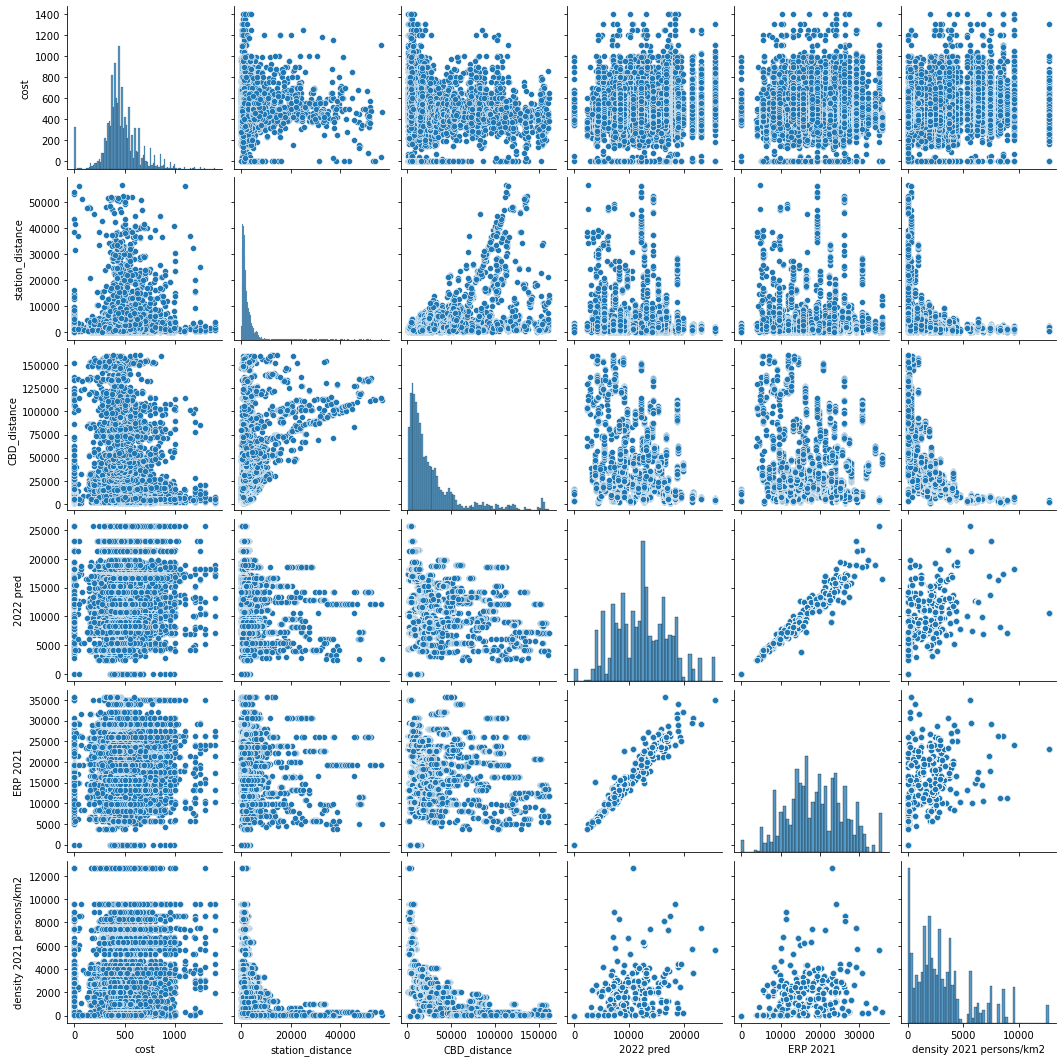

In [150]:
sns.pairplot(numeric_variables)

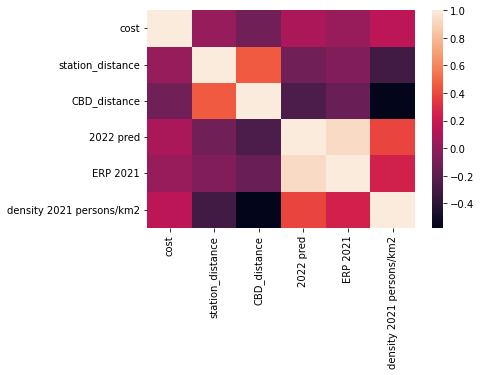

In [134]:
# flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(numeric_variables.corr())

In [151]:
numeric_variables.corr()

,cost,station_distance,CBD_distance,2022 pred,ERP 2021,density 2021 persons/km2
cost,1.000000,0.014312,-0.117342,0.086020,0.022223,0.154193
station_distance,0.014312,1.000000,0.452121,-0.120259,-0.063335,-0.306389
CBD_distance,-0.117342,0.452121,1.000000,-0.257596,-0.148442,-0.577694
2022 pred,0.086020,-0.120259,-0.257596,1.000000,0.927011,0.388161
ERP 2021,0.022223,-0.063335,-0.148442,0.927011,1.000000,0.242273
density 2021 persons/km2,0.154193,-0.306389,-0.577694,0.388161,0.242273,1.000000
